<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [2]:
import pandas as pd
import psycopg2 #для подключения к базам данных

In [3]:
import password as p #загружаем параметры подключения из файла py

In [4]:
# устанавливаем соединение
connection = psycopg2.connect(
    dbname=p.DBNAME,
    user=p.USER,
    host=p.HOST,
    password=p.PASSWORD,
    port=p.PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies).

In [5]:
query_3_1 = f'''SELECT COUNT(id)
           from vacancies
'''

df = pd.read_sql_query(query_3_1, connection)
df


,count
0,49197


*Количество вакансий в базе данных составляет 49197.*

2. Напишите запрос, который посчитает количество работодателей (таблица employers).

In [6]:
query_3_2 = f'''SELECT COUNT(id)
           from employers
'''

df = pd.read_sql_query(query_3_2, connection)
df


,count
0,23501


*Количество работодателей составляет 23501.*

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [7]:
query_3_3 = f'''SELECT COUNT(id)
           from areas
'''

df = pd.read_sql_query(query_3_3, connection)
df


,count
0,1362


*Количество регионов составляет 1362.*

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [8]:
query_3_4 = f'''SELECT COUNT(id)
           from industries
'''

df = pd.read_sql_query(query_3_4, connection)
df

,count
0,294


*Количество сфер деятельности в базе данных составляет 294.*

***

На основании предварительного анализа данных можно сделать вывод о том, что рассматриваемая БД содержит информацию о широком перечне сфер деятельности, работодателей и регионов.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [9]:
query_4_1 = f'''SELECT
                  a.name,
                  COUNT(v.id)
                FROM vacancies v JOIN areas a ON v.area_id=a.id
                GROUP BY a.id
                ORDER BY 2 DESC
              '''

df = pd.read_sql_query(query_4_1, connection)
df

,name,count
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Кизляр,1
765,Джизак,1
766,Эртиль,1
767,Арсеньев,1


*Пятерка городов-лидеров по количеству вакансий: Москва, Санкт-Петербург, Минск, Новосибирск, Алматы.*

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [10]:
query_4_2 = f'''SELECT COUNT(id)
                 FROM vacancies AS v
                WHERE (v.salary_from IS NOT NULL)
                OR (v.salary_to IS NOT NULL)
              '''

df = pd.read_sql_query(query_4_2, connection)
df

,count
0,24073


*У 24073 вакансий заполнено хотя бы одно из двух полей с зарплатой.*

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [11]:
query_4_3 = f'''SELECT
                  AVG(salary_from) AS avg_from,
                  AVG(salary_to) AS avg_to
                FROM vacancies
              '''

df = pd.read_sql_query(query_4_3, connection)
df

,avg_from,avg_to
0,71064.657901,110536.741923


*Уровень зарплат в среднем лежит в диапазоне от 71065 до 110537.*

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [12]:
query_4_4 = f'''SELECT
                  schedule,
                  employment,
                  COUNT(id)
                FROM vacancies
                GROUP BY schedule, employment
                ORDER BY 3 DESC
              '''

df = pd.read_sql_query(query_4_4, connection)
df

,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


*Самый популярный тип трудоустройства - полная занятость, а популярными типами рабочего графика являются: полный день, удаленная работа, гибкий график.*

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта.

In [13]:
query_4_5 = f'''SELECT
                  experience,
                  COUNT(id)
                FROM vacancies
                GROUP BY experience
                ORDER BY 2
              '''

df = pd.read_sql_query(query_4_5, connection)
df

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


*Наиболее востребованный вариант опыта работы - от 1 до 3 лет, наименее востребованный - более 6 лет.*

***

Больше всего вакансий предложено в крупных городах и городах-столицах. Примерно в половине вакансий указана заработная плата (от 70 до 110 тыс в среднем). Наиболее популярным сочетанием типа трудоустройства и рабочего графика является полная занятость на полный день. Наиболее востребованы кандидаты с опытом работы от 1 года.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [14]:
query_5_1 = f'''SELECT
                  e.name,
                  COUNT(v.id)
                FROM vacancies v JOIN employers e ON v.employer_id=e.id
                GROUP BY e.id
                ORDER BY 2 DESC
                LIMIT 5
              '''

df = pd.read_sql_query(query_5_1, connection)
df

,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


*На первом месте по количеству вакансий из работодателей находится Яндекс, на пятом - Газпром нефть.*

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [15]:
query_5_2 = f'''SELECT
                  a.name AS region, --выбираем полный список регионов
                  COUNT(DISTINCT e.id) AS empl, --считаем работодателей без повторов
                  COUNT(v.id) AS vac  --считаем вакансии
                FROM areas a
                LEFT JOIN employers e ON e.area=a.id --присоединяем работодателей с сохранением всех регионов
                LEFT JOIN vacancies v ON v.area_id=a.id --присоединяем вакансии с сохранением всех регионов
                WHERE v.id IS NULL
                GROUP BY a.name
                ORDER BY 3, 2 DESC
              '''

df = pd.read_sql_query(query_5_2, connection)
df

,region,empl,vac
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
...,...,...,...
588,Кувандык,0,0
589,Куйбышев,0,0
590,Куйбышево (Ростовская область),0,0
591,Култаево,0,0


*Вакансии, как правило, публикуют с привязкой к городу, а не к стране или региону.*

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [16]:
query_5_3 = f'''SELECT
                  e.name ,
                  COUNT(DISTINCT v.area_id) AS region
                FROM vacancies v JOIN employers e ON v.employer_id = e.id
                GROUP BY e.id
                ORDER BY 2 DESC
              '''

df = pd.read_sql_query(query_5_3, connection)
df

,name,region
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14901,НПП Авиатрон,1
14902,Центр дистанционных торгов,1
14903,Городские Телекоммуникационные Системы,1
14904,"Введенский, Отель",1


*Самый большой географический охват у компании "Яндекс".*

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности.

In [17]:
query_5_4 = f'''SELECT
                COUNT(DISTINCT e.id)
                FROM employers e
                LEFT JOIN employers_industries i
                ON e.id = i.employer_id
                WHERE i.industry_id IS NULL
              '''

df = pd.read_sql_query(query_5_4, connection)
df

,count
0,8419


*У 8419 работодателей не указана сфера деятельности.*

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.

In [18]:
query_5_5 = f'''SELECT
                  e.name,  -- наименование работодателя
                  COUNT(i.industry_id)  -- соличество сфер  деятельности
                FROM employers e  --  из списка работодателей
                LEFT JOIN employers_industries i  -- присоединить сферы деятельности по работодателям с сохранением наименования работодателя
                ON e.id = i.employer_id
                GROUP BY e.id
                HAVING COUNT(i.industry_id) = 4  -- оставить работодателей с 4 сферами деятельности
                ORDER BY 1
                OFFSET 2 --убрать 2 верхние строки
                LIMIT 1  --оставить строку
              '''

df = pd.read_sql_query(query_5_5, connection)
df

,name,count
0,2ГИС,4


*Компания, находящаяся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности: 2ГИС.*

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [19]:
query_5_6 = f'''SELECT
                COUNT(DISTINCT ei.employer_id)  --считаем работодателей без повторов
                FROM employers_industries ei
                JOIN industries i
                ON ei.industry_id = i.id
                WHERE i.name = 'Разработка программного обеспечения'
              '''

df = pd.read_sql_query(query_5_6, connection)
df

,count
0,3553


*У 3556 работодателей в качестве сферы деятельности указана Разработка программного обеспечения.*

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании, собранных в этой таблице. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8).

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API.

In [21]:
# Для автоматического преобразования ссылки
#import urllib.parse as req
#path_common = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России#Список_городов-миллионеров')
#url = path_common.scheme + '://' + req.quote(path_common.netloc) +  req.quote(path_common.path) + '#'+ req.quote(path_common.fragment)

import requests

url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России' # адрес страницы со списком городов-миллионников
table = pd.read_html(requests.get(url).text)[1]  # записываем таблицу с городами в переменную
cities = tuple(list(table['Город'])) # сохраняем список городов в кортеж

#display(cities)

In [22]:
query_5_7 = f'''WITH yandex AS (
                    SELECT e.id
                    FROM employers e
                    WHERE e.name='Яндекс' --выясняем айди Яндекса

                 ), list AS (      --формируем таблицу
                    SELECT
                    a.name AS city, -- выбираем список городов
                    COUNT(v.id) AS cnt  --количество вакансий
                    FROM vacancies v
                    JOIN areas a
                    ON a.id = v.area_id
                    GROUP BY a.id, v.employer_id  -- группировка по городам и работодателям
                    HAVING v.employer_id =  (SELECT id FROM yandex)
                      AND a.name IN {cities}  -- работодатель 'Яндекс' по айди, города из списка
                    ORDER BY 2
                    )
              -- полученной таблице предаем запрашиваемый внешний вид
                SELECT * FROM list

                UNION ALL

                SELECT
                  'TOTAL', SUM(cnt)
                FROM list

              '''

df = pd.read_sql_query(query_5_7, connection)
df

,city,cnt
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Ростов-на-Дону,25.0
5,Казань,25.0
6,Пермь,25.0
7,Самара,26.0
8,Уфа,26.0
9,Краснодар,30.0


*Всего размещено 485 вакансий от Яндекса в городах-миллионниках России.*

***

С большим отрывом по количеству вакансий и по количеству регионов размещения лидирует Яндекс. Работодатели стараются размещать вакансии по городам, а местом своей регистрации указывают регион или страну. Примерно 1/3 работодателей не указывают сферу деятельности, остальные перечислют все сферы деятельности.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.*


In [23]:
query_6_1 = f'''SELECT
                COUNT(v.id)
                FROM vacancies AS v
                WHERE (LOWER(v.name) LIKE '%data%') OR (LOWER(v.name) LIKE '%данн%')

              '''

df = pd.read_sql_query(query_6_1, connection)
df

,count
0,1771


*1771 вакансия имеет отношение к данным.*

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста?
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.


In [27]:
query_6_2 = f'''SELECT
                    COUNT(v.id)  -- количесво вакансий
                FROM vacancies AS v
                WHERE (   -- где описание вакансии похоже на перечисленные формулировки, но не содержит HTML
                    (v.name ILIKE '%data scientist%')
                    OR (v.name ILIKE '%data science%')
                    OR (v.name ILIKE '%исследователь данных%')
                    OR (v.name ILIKE '%machine learning%')
                    OR (v.name ILIKE '%машинн%обучен%')
                    OR ((v.name LIKE '%ML%') AND (v.name NOT ILIKE '%HTML%'))
                    )
                    AND (
                    (v.name ILIKE '%junior%') -- наименование содержит junior
                    OR v.experience = 'Нет опыта'  -- или критерий по столбцу опыт
                    OR v.employment = 'Стажировка'  -- или критерий по типу трудоустройства
                    )
              '''

df = pd.read_sql_query(query_6_2, connection)
df

,count
0,51


*Для начинающего дата-сайентиста есть 51 вакансия.*

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [29]:
query_6_3 = f'''SELECT
                    COUNT(v.id)
                FROM vacancies AS v
                WHERE (
                    (v.name ILIKE '%data scientist%')
                    OR (v.name ILIKE '%data science%')
                    OR (v.name ILIKE '%исследователь данных%')
                    OR (v.name ILIKE '%machine learning%')
                    OR (v.name ILIKE '%машинн%обучен%')
                    OR ((v.name LIKE '%ML%') AND (v.name NOT ILIKE '%HTML%'))
                    )
                    AND (
                    (v.key_skills ILIKE '%postgres%')
                    OR v.key_skills ILIKE '%SQL%'
                    )
              '''

df = pd.read_sql_query(query_6_3, connection)
df

,count
0,201


*Для DS есть 201 вакансия, в которой в качестве ключевого навыка указан SQL или postgres.*

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [30]:
query_6_4 = f'''SELECT
                    COUNT(v.id)
                FROM vacancies AS v
                WHERE (
                    (v.name ILIKE '%data scientist%')
                    OR (v.name ILIKE '%data science%')
                    OR (v.name ILIKE '%исследователь данных%')
                    OR (v.name ILIKE '%machine learning%')
                    OR (v.name ILIKE '%машинн%обучен%')
                    OR ((v.name LIKE '%ML%') AND (v.name NOT ILIKE '%HTML%'))
                    )
                    AND (v.key_skills ILIKE '%python%')
              '''

df = pd.read_sql_query(query_6_4, connection)
df

,count
0,351


*Количество вакансий, в которых в качестве ключевого навыка указан Python, равно 351.*

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [31]:
query_6_5 = f'''SELECT
                    -- вычисляем разницу в длине строки после удаления табуляций
                    -- прибавляем единицу, так как табуляции между элементами списка,
                    -- значит, самих элементов на 1 больше, чем табуляций
                    AVG(length(v.key_skills) - length(replace(v.key_skills, CHR(9), ''))+1)

                FROM vacancies AS v
                WHERE (
                    (v.name ILIKE '%data scientist%')
                    OR (v.name ILIKE '%data science%')
                    OR (v.name ILIKE '%исследователь данных%')
                    OR (v.name ILIKE '%machine learning%')
                    OR (v.name ILIKE '%машинн%обучен%')
                    OR ((v.name LIKE '%ML%') AND (v.name NOT ILIKE '%HTML%'))
                    )
              '''

df = pd.read_sql_query(query_6_5, connection)
df

,avg
0,6.406032


*В вакансиях для DS в среднем указывают 6,41 ключевых навыков.*

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*).

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа.

In [32]:
query_6_6 = f'''SELECT
                    v.experience,
                      -- округляем полученное среднее значение
                      -- проверяем значения 1 и 2 столбца зарплаты по очереди (если=0, берем второе) и делим на 2
                      -- таким образом, мы получаем либо сумму одинаковых половинок, либо среднюю двух значений
                    ROUND(AVG(coalesce(v.salary_from, v.salary_to)/2+coalesce(v.salary_to, v.salary_from)/2), 0)
                FROM vacancies AS v
                WHERE (
                    (v.name ILIKE '%data scientist%')
                    OR (v.name ILIKE '%data science%')
                    OR (v.name ILIKE '%исследователь данных%')
                    OR (v.name ILIKE '%machine learning%')
                    OR (v.name ILIKE '%машинн%обучен%')
                    OR ((v.name LIKE '%ML%') AND (v.name NOT ILIKE '%HTML%'))
                    )
                    AND ((v.salary_from IS NOT NULL) OR (v.salary_to IS NOT NULL))
                GROUP BY (v.experience)
              '''

df = pd.read_sql_query(query_6_6, connection)
df

,experience,round
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


*Дата-сайентист с опытом работы от 3 до 6 лет в среднем может рассчитывать на зарплату около 243115.*

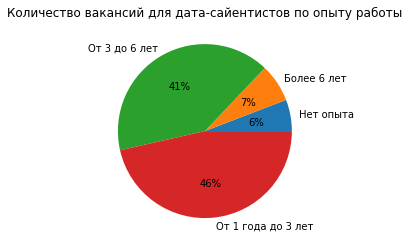

In [33]:
# сколько вакансий для дата-сайентистов для каждой группы по опыту работы
query_add_1 = f'''SELECT
                    v.experience,
                    COUNT(v.id)
                FROM vacancies AS v
                WHERE (
                    (v.name ILIKE '%data scientist%')
                    OR (v.name ILIKE '%data science%')
                    OR (v.name ILIKE '%исследователь данных%')
                    OR (v.name ILIKE '%machine learning%')
                    OR (v.name ILIKE '%машинн%обучен%')
                    OR ((v.name LIKE '%ML%') AND (v.name NOT ILIKE '%HTML%'))
                    )
                GROUP BY (v.experience)
                ORDER BY 2
              '''

df_add_1 = pd.read_sql_query(query_add_1, connection)
#df_add_1

import seaborn as sns
import matplotlib.pyplot as plt


plt.pie(df_add_1['count'], labels = df_add_1['experience'], autopct='%.0f%%')
plt.title('Количество вакансий для дата-сайентистов по опыту работы')
plt.show()

Всего 1771 вакансия, имеющая отношение к данным. Из них 51 вакансия подходит начинающему дата-сайентисту. Заработная плата для него в среднем составляет 74643. Заработная плата для дата-сайентиста с опытом работы более 6 лет не указана, из чего можно сделать вывод, что её размер оговаривается индивидуально с каждым специалистом. Дополнительные исследования данных показывают, что такие специалисты востребованы даже в большей степени, чем начинающие.

***

# Общий вывод по проекту

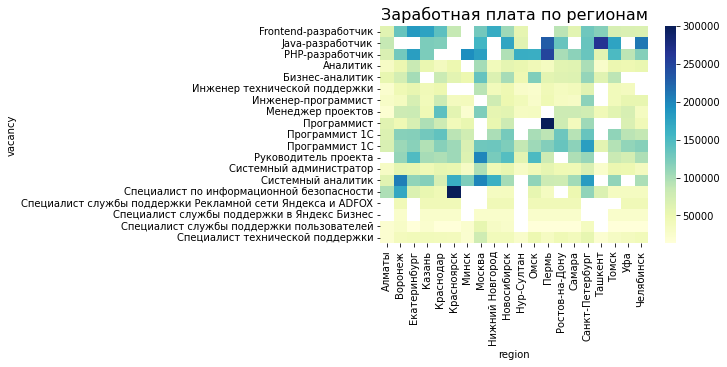

In [34]:
# Заработная плата по рионам для разных вакансий

# 1. Выберем самые популярные вакансии
query_add_2_1 = f'''SELECT
                    v.name,
                    COUNT(v.id)
                  FROM vacancies AS v
                  GROUP BY v.name
                  ORDER BY 2 DESC
                  LIMIT 20
              '''
df_add_2_1 = pd.read_sql_query(query_add_2_1, connection)
#df_add_2_1
# Данное исследование показывает, что самыми популярными вакансиями являются Системный администратор и Программист 1С
pop_vac = tuple(list(df_add_2_1['name'])) # список 20 самых популярных вакансий


# 2. Выберем самые популярные регионы
query_add_2_2 = f'''SELECT
                  a.name,
                  COUNT(v.id)
                FROM vacancies v JOIN areas a ON v.area_id=a.id
                GROUP BY a.id
                ORDER BY 2 DESC
                LIMIT 20
              '''
df_add_2_2 = pd.read_sql_query(query_add_2_2, connection)
#df_add_2_2
# Данное исследование проводилось ранее в пункте 4.1
pop_cit = tuple(list(df_add_2_2['name'])) # список 20 самых популярных регионов


# 3. Объединим данные по вакансиям и регионам в таблицу с указанием средней заработной платы
query_add_2_3 = f'''SELECT
                    v.name AS vacancy,
                    a.name AS region,
                    ROUND(AVG(coalesce(v.salary_from, v.salary_to)/2+coalesce(v.salary_to, v.salary_from)/2), 0) AS salary
                FROM vacancies AS v JOIN areas AS a ON v.area_id=a.id
                WHERE
                    v.name IN {pop_vac}
                    AND a.name IN {pop_cit}
                GROUP BY v.name, a.id
                ORDER BY 1, 2
              '''
df_add_2_3 = pd.read_sql_query(query_add_2_3, connection)
#df_add_2_3


# 4. Строим тепловую карту
pivot = df_add_2_3.pivot_table(
    index='vacancy',
    columns='region',
    values='salary'
)

pivot.columns = pivot.columns.astype('string')
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Заработная плата по регионам', fontsize=16);

# Данное исследование показывает присутствие некоторой неравномерности распределения заработной платы по регионам при рассмотрении ряда аналогичных вакансий.
# Например, ниже всего уровень заработных плат прослеживается в Алматы, Минске, Нур-Султане, Уфе. В Москве, Санкт-Петербурге, Екатеринбурге, Воронеже зарплаты предложены несколько выше, чем в других регионах.
# Кроме того, из таблицы можно заметить, что самыми высокооплачиваемыми специализациями являются разработчики и программисты 1С, а самыми низкооплачиваемыми - аналитики и специалисты тех поддержки.

In [35]:
# Если средний уровень размера оплаты труда зависит от региона, справедливо ли это утверждение для компаний, размещающих вакансии повсеместно?
# Ранее мы выяснили, что больше всего вакансий размещает Яндекс. Посмотрим на его примере, есть ли разница в средних зарплатах по регионам.
# Из предыдущих исследований данных видно, что наиболее частым сочетанием в названии вакансий является "Специалист поддержки".
# Чтобы исключить вероятность влияния опыта на размер заработной платы, зададим параметр 'Нет опыта'
# Поскольку регионов размещения вакансий у Яндекса много, для наглядности возьмем только 4 города РФ (2 высокооплачиваемых и 2 низкооплачиваемых) на основании тепловой карты.

# 5. Посмотрим на уровень заработных плат по регионам для аналогичных вакансий с аналогичными требованиями к опыту на примере Яндекса
query_add_2_5 = f'''SELECT
                        a.name AS region,
                        COUNT(v.id),
                        ROUND(AVG(coalesce(v.salary_from, v.salary_to)/2+coalesce(v.salary_to, v.salary_from)/2), 0) AS salary
                    FROM vacancies AS v
                    JOIN areas AS a ON v.area_id=a.id
                    JOIN employers AS e ON e.id = employer_id
                    WHERE e.name = 'Яндекс'
                        AND v.name LIKE  'Специалист%поддержк%'
                        AND v.experience='Нет опыта'
                        AND (a.name='Москва' OR a.name='Санкт-Петербург' OR a.name='Уфа'  OR a.name='Самара')
                    GROUP BY a.name
                    ORDER BY 1
              '''
df_add_2_5 = pd.read_sql_query(query_add_2_5, connection)
df_add_2_5

# Любопытно, что в городах с повышенными зарплатами вакансий размещено меньше, а в городах, где зарплата ниже, чем в других регионах - наоборот.

,region,count,salary
0,Москва,2,19500.0
1,Самара,11,24409.0
2,Санкт-Петербург,3,33000.0
3,Уфа,11,24318.0


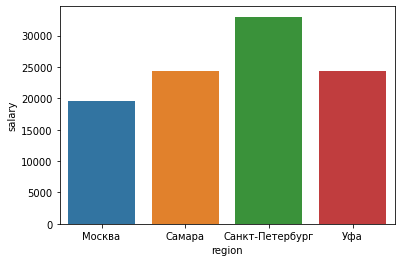

In [36]:
sns.barplot(x="region", y="salary", data=df_add_2_5);
# Заработная плата, предлагаемая одной компанией, не зависит от регионов размещения вакансий.

In [37]:
# Посмотрим тип занятости для предыдущей выборки.
query_add_2_6 = f'''SELECT
                        a.name,
                        v.schedule,
                        COUNT(v.id)
                    FROM vacancies AS v
                    JOIN areas AS a ON v.area_id=a.id
                    JOIN employers AS e ON e.id = employer_id
                    WHERE e.name = 'Яндекс'
                        AND v.name LIKE  'Специалист%поддержк%'
                        AND v.experience='Нет опыта'
                        AND (a.name='Москва' OR a.name='Санкт-Петербург' OR a.name='Уфа'  OR a.name='Самара')
                    GROUP BY a.name, v.schedule
                    ORDER BY 1
              '''
df_add_2_6 = pd.read_sql_query(query_add_2_6, connection)
df_add_2_6

# Из полученных результатов видно, что преоблабдающим типом занятости является удаленная работа.
# На основании этого можно сделать вывод о том, что компании выгодно размещать объявления в регионах с низким уровнем заработной платы.
# Т.е. компания может поддерживать одинаковый низкий уровень заработной платы просто не размещая их в регионах с зарплатами выше среднего.

,name,schedule,count
0,Москва,Удаленная работа,2
1,Самара,Сменный график,2
2,Самара,Удаленная работа,9
3,Санкт-Петербург,Удаленная работа,3
4,Уфа,Гибкий график,1
5,Уфа,Сменный график,2
6,Уфа,Удаленная работа,8


In [38]:
# Исследуем данные в разрезе сферы деятельности
query_add_3 = f'''WITH temp_1 AS
                    -- присоединяем наименование сфер деятельности к таблице соответствия сфер деятельности и работодателей
                    (SELECT * FROM employers_industries ei
                    JOIN industries i ON i.id = ei.industry_id),
                    -- собираем в таблицу данные для анализа
                    temp_2 AS (SELECT t.name AS industry, -- сфера деятельности
                    v.name AS vacancy, -- наименование вакансии
                    v.id, -- вакансии
                    v.salary_from, -- заработная плата (нижняя планка)
                    v.salary_to,  -- заработная плата (верхняя планка)
                    v.employer_id FROM temp_1 AS t  -- работодатели (код)
                    JOIN vacancies AS v ON v.employer_id = t.employer_id)

                SELECT
                  t.industry,  -- сфера деятельности
                  COUNT(t.id) AS vacancies_cnt,  -- количество вакансий
                  COUNT(DISTINCT t.vacancy) AS vac_name_cnt, -- номенклатура вакансий
                  COUNT(DISTINCT t.employer_id) AS employers_cnt,  -- работодатели
                  AVG(coalesce(t.salary_from, t.salary_to)/2+coalesce(t.salary_to, t.salary_from)/2) AS avg_salary -- средняя заработная плата
                FROM temp_2 t --формируется из второй вспомогательной таблицы
                GROUP BY t.industry
                ORDER BY 2 DESC
              '''
# Больше всего вакансий в области разработки программного обеспечения И в области системной интеграции, автоматизации технологических и бизнес-процессов предприятия, ИТ-консалтинга.
# Аналогичная картина и по числу работодателей в сферах деятельности.
# А вот по зарплатам в лидеры выходят компании химической отрасли, игорные, кадровые, строительные и другие.
# На производственных предприятиях в России чаще всего бывают нужны программисты 1С,
# а как мы помним из таблицы, они относятся к одной из самых высокооплачиваемых и востребованных профессий.
# Безусловно существует взаимосвязь между масштабом компании и уровнем зарплат, а в некоторых отраслях концентрация таких компаний больше, т.е. косвенно между уровнем зарплат и отраслью.
# Однако в крупных ИТ компаниях гораздо больше выбор вакансий (в том числе и низкооплачиваемых), которые снижают средний уровень заработной платы.
df_add_3 = pd.read_sql_query(query_add_3, connection)
df_add_3

,industry,vacancies_cnt,vac_name_cnt,employers_cnt,avg_salary
0,Разработка программного обеспечения,12499,6302,2592,117658.500656
1,"Системная интеграция, автоматизации технологи...",11034,5423,2160,102284.487929
2,"Интернет-компания (поисковики, платежные систе...",6413,2770,1157,70461.762031
3,Банк,2742,1747,200,84008.713198
4,Мобильная связь,1585,1010,105,52299.927224
...,...,...,...,...,...
288,Ветеринарная аптека,5,5,4,57500.000000
289,Химчистка,4,4,3,53125.000000
290,"Ассоциация в сфере культуры, искусства",2,2,1,NaN
291,Ритуальные услуги,1,1,1,37400.000000


In [39]:
# Влияет ли опыт на средний размер заработной платы
query_add_4 = f'''SELECT
                    v.experience,
                    AVG(coalesce(v.salary_from, v.salary_to)/2+coalesce(v.salary_to, v.salary_from)/2) AS avg_salary
                  FROM vacancies v
                  GROUP BY v.experience
                  ORDER BY 2 DESC
              '''
df_add_4 = pd.read_sql_query(query_add_4, connection)
df_add_4

# Данное исследование подтверждает прямую зависимость заработной платы от опыта (больше опыт - больше зарплата)

,experience,avg_salary
0,Более 6 лет,166256.023636
1,От 3 до 6 лет,133210.862454
2,От 1 года до 3 лет,76540.780950
3,Нет опыта,40471.919090


In [6]:
# закрытие соединения после окончания работы
connection.close()

### Анализ рынка труда
Всего представлено:
*   49197 вакансий (для 24073 указана заработная плата);
*   23501 работодателей (у 8419 не указана сфера деятельности);
*   1362 региона;
*   294 сферы деятельности.
Большинство вакансий в Москве и Санкт-Петербурге. Самый популярный тип трудоустройства - полная занятость, самый популярный тип графика - полный день.

### Общий анализ вакансий
В целом, по регионам при рассмотрении ряда аналогичных вакансий присутствует некоторая неравномерность. Например, ниже всего уровень заработных плат прослеживается в Алматы, Минске, Нур-Султане, Уфе. В Москве, Санкт-Петербурге, Екатеринбурге, Воронеже зарплаты предложены несколько выше, чем в других регионах.

Если у компаний широкий охват по регионам, то это, скорее всего, удаленная работа. Для компаний выгодно размещать вакансии в регионах, где средний уровень заработной платы низкий.

Также уровень заработной платы зависит от опыта (больше опыт - больше зарплата) и специализации.
Самыми высокооплачиваемыми специализациями являются разработчики и программисты 1С, а самыми низкооплачиваемыми - аналитики и специалисты тех поддержки.

Самыми популярными вакансиями являются Системный администратор и Программист 1С.


### Анализ вакансий для дата-сайентистов
Для дата-сайентистов имеется 480 вакансй из 1771 относитсящихся к данным. Зарплаты для этих вакансий лежат в диапозоне от 76,6 тысяч до 243 тысяч. 51 вакансия подходит дата-сайентистам без опыта.
В среднем требуется около 6 ключевых навыков для рассматриваемой професси. К наиболее популярным относятся Python (351 вакансия) и Postgre и SQL (201 вакансия).
Наиболее востребованы дата-сайентисты с опытом работы от 1 до 3 лет, наименее востребованы специалисты без опыта работы, что отличается от общей тенденции (самый низкий спрос на специалистов с опытом работы более 6 лет).
